# 7.7.1 Algoritmo de agrupamiento K-means

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

Este es el problema inverso al de clasificación. En la siguiente figura se desea determinar cuántos grupos existen en un conjunto de datos y los centroides de dichos grupos, tal que los miembros de cada grupo tengan unas características similares. El centroide de cada grupo representa a los miembros de su grupo.

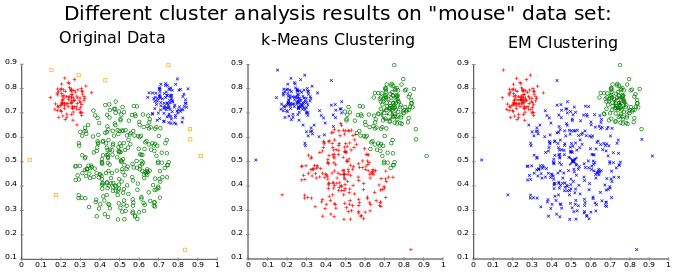

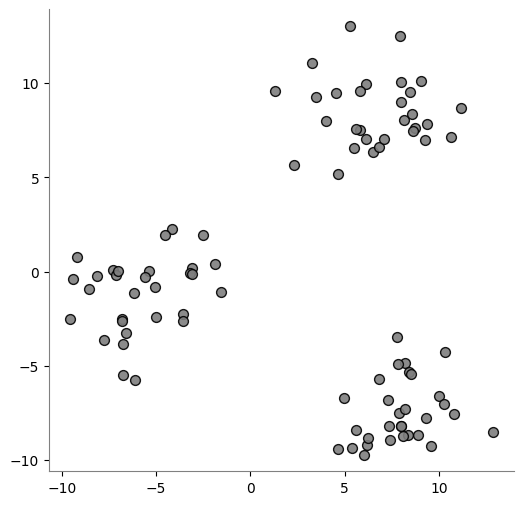

In [10]:
X, y = make_blobs(
    n_samples=90,
    n_features=2,
    centers=[
        [8, -8],
        [7, 8],
        [-6, -1],
    ],
    cluster_std=2.0,
    shuffle=False,
    random_state=5,
)

plt.figure(figsize=(6, 6))

plt.scatter(
    X[:, 0],
    X[:, 1],
    color="tab:gray",
    edgecolors="k",
    s=50,
    alpha=0.9,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

En el algoritmo K-means, se pretende minimizar la distancia entre los miembros de cada grupo y maximizar la distancia entre grupos, también conocido como principio de inercia. Para ello, en este algoritmo se minimiza:

$$ \sum_{i=1}^{k} \sum_{x_j \epsilon S_i}^{} dist(x_j, u_i) $$

Si se usa la norma euclidiana:

$$ dist(x_j, u_i) = ∥x_j − u_i∥^2 = \sum_{p=1}^{P} (x_{jp} − u_{ip})^2 $$

La inercia es reconocida como una medida de la coherencia interna de los patrones que representan cada cluster o grupo.

Se sabe que esta métrica sufre varios problemas:

- Asume que los clusters son convexos e isotropicos, por lo que tiene una efectividad limitada para clusters elogados o con formas irregulares.
- La inercia es un valor no normalizado, por que se sabe que los valores bajos son mejores y que un valor de cero es óptimo.
- Las distancias euclidianas en altas dimensiones tienden a ser infladas, por lo que las técnicas para reducir la dimensionalidad son consideradas para el preprocesamiento de los datos.

Este proceso se realiza en dos fases:

**Paso 1:** Se generan los centros iniciales $u_i$. Podrían ser aleatorios o seleccionados entre los datos.

In [11]:
#
# Se generan tres centros elatorios iniciales
#
centers = np.array(
    [
        [-5, 7],
        [0, -8],
        [13, 0],
    ],
    dtype=np.float64,
)

**Paso 2**: Dados los centros de los clusters $u_i$, se calcula la distancia de cada uno de los puntos del dataset a los centros de los clusters.

In [12]:
distances = euclidean_distances(X, centers)
distances[:5, :]

array([[20.92875212,  8.9070706 ,  9.59061636],
       [23.65194338, 12.87142082,  8.50531131],
       [17.74305182,  8.80752849,  6.79951841],
       [19.67041089,  6.29376779, 11.4378307 ],
       [20.59426138,  8.4011511 ,  9.81732198]])

**Paso 3**: Se asigna cada punto del dataset al cluster más cercano.

In [14]:
labels = np.argmin(distances, axis=1)
labels

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1], dtype=int64)

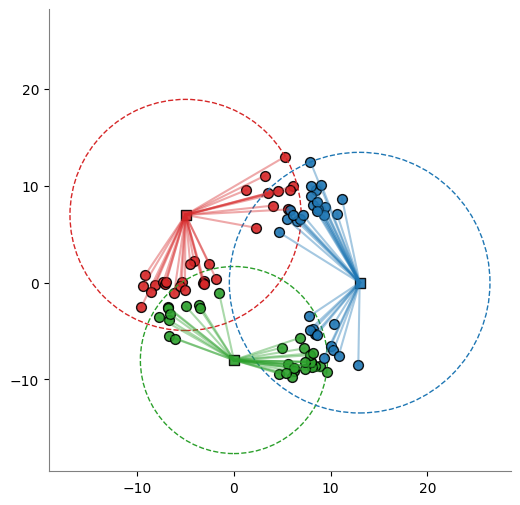

In [16]:
def plot_clusters(X, centers, labels):

    colors = ["tab:red", "tab:green", "tab:blue"]

    plt.figure(figsize=(6, 6))

    for cluster in np.unique(labels):

        X_cluster = X[labels == cluster, :]

        plt.scatter(
            X_cluster[:, 0],
            X_cluster[:, 1],
            color=colors[cluster],
            edgecolors="k",
            s=50,
            alpha=0.9,
        )

        for i in range(X_cluster.shape[0]):
            plt.plot(
                [centers[cluster, 0], X_cluster[i, 0]],
                [centers[cluster, 1], X_cluster[i, 1]],
                color=colors[cluster],
                alpha=0.4,
            )

        plt.scatter(
            centers[cluster, 0],
            centers[cluster, 1],
            marker="s",
            color=colors[cluster],
            edgecolors="k",
            s=50,
            alpha=0.9,
        )

        distances = euclidean_distances(
            X_cluster, np.expand_dims(centers[cluster, :], axis=0)
        ).reshape(-1)

        radius = distances.max()

        plt.gca().add_patch(
            Circle(
                xy=centers[cluster, :],
                radius=radius,
                fill=False,
                ec=colors[cluster],
                ls="--",
            )
        )

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.axis("square")
    plt.show()


plot_clusters(X, centers, labels)

**Paso 4**: Se recalcula cada centro $u_i$ como el promedio de los puntos $x_j$ que pertenecen a él; es decir, la componente $u_{ip}$ del centroide $i$ es el promedio de las componentes $x_{jp}$.

In [17]:
def compute_centers(X, centers, labels):

    for cluster in np.unique(labels):
        centers[cluster, :] = np.mean(
            X[labels == cluster, :],
            axis=0,
        )
    return centers

centers = compute_centers(X, centers, labels)
centers

array([[-2.38591678,  3.2492107 ],
       [ 2.45751494, -6.44235461],
       [ 8.47942768,  3.03165143]])

El algoritmo se detiene cuando ningún punto cambia de cluster.

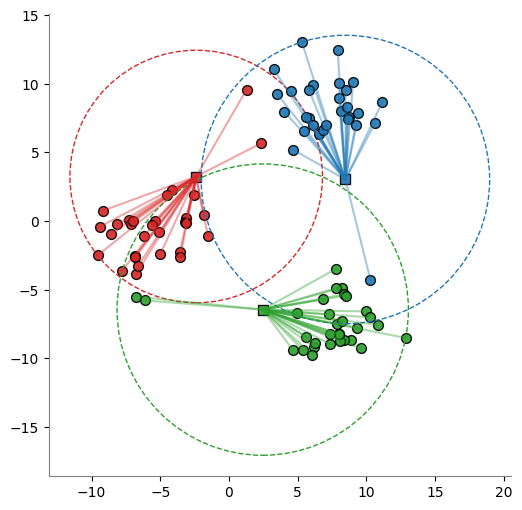

array([[-5.19206228, -0.26197605],
       [ 6.97409343, -7.43261021],
       [ 7.13658938,  8.0416505 ]])

In [18]:
#
# Iteración #2
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

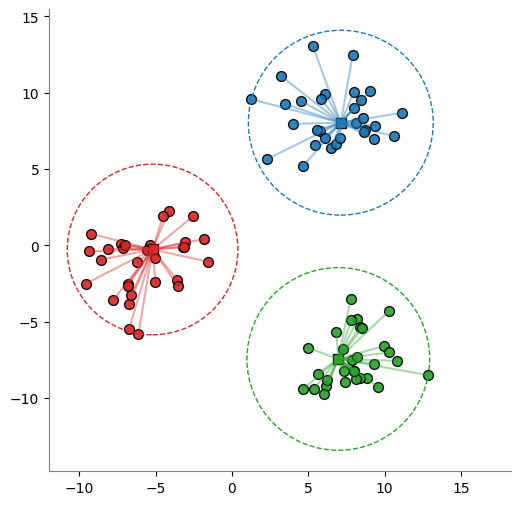

array([[-5.7408924 , -1.1458363 ],
       [ 7.97850671, -7.44748742],
       [ 6.67558968,  8.42457928]])

In [19]:
#
# Iteración #3
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

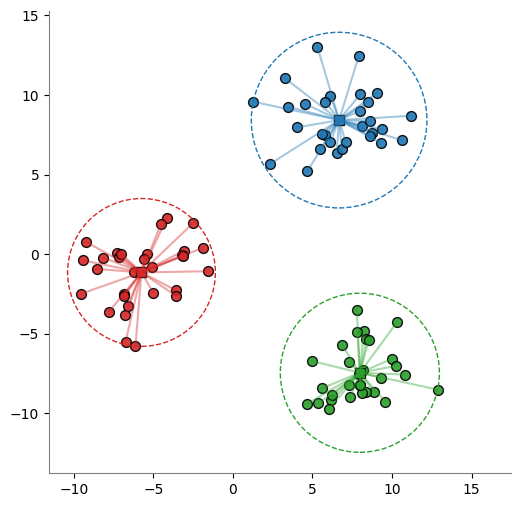

array([[-5.7408924 , -1.1458363 ],
       [ 7.97850671, -7.44748742],
       [ 6.67558968,  8.42457928]])

In [20]:
#
# Iteración #4
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

## 7.7.1.1 Usando Kmeans

In [22]:
kmeans = KMeans(
    # -------------------------------------------------------------------------
    # Numero de clusters
    n_clusters=3,
    # -------------------------------------------------------------------------
    # Algoritmo para inicializar los clusters:
    # 'k-means++': Selecciona los puntos iniciales entre los datos del dataset
    # 'random': aleatorio
    init="k-means++",
    # -------------------------------------------------------------------------
    #
    n_init=10,
    # -------------------------------------------------------------------------
    #
    max_iter=300,
    # -------------------------------------------------------------------------
    #
    random_state=None,
    # -------------------------------------------------------------------------
    # 'full': algoritmo clásico,
    # 'elkan': variación con eficiencia computacional que evita computar las
    # distancias entre todos los puntos.
    algorithm="auto",
)

kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
#
# Centros de los clusters
#
kmeans.cluster_centers_

array([[ 6.67558968,  8.42457928],
       [ 7.97850671, -7.44748742],
       [-5.7408924 , -1.1458363 ]])

In [24]:
#
# Cluster asignado a cada punto
#
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [25]:
#
# Sum of squared distances of samples to their closest cluster center, weighted
# by the sample weights if provided.
#
kmeans.inertia_

715.9389324313938

In [26]:
kmeans.n_iter_

2

## 7.7.1.2 Agrupamiento usando KMeans en Python

Actividad.– Para los siguientes centros de clusters (9.96, 13.31), (13.24, 8.58) y (14.58, 17.01) asigne cada patrón a uno de los clusters (los datos se encuentran en el archivo de Microsoft Excel).

Actividad.— Compute los nuevos centros de los clusters y asigne nuevamente los ejemplos a los clusters hasta que el algoritmo converja.

In [28]:
#
# Datos del problema de excel
#
x_sample = np.array(
    [
        32.0, 19.5, 13.3, 13.3, 5.0, 7.1, 34.5, 20.3, 31.7, 17.9, 34.8, 6.3, 13.0, 20.4, 13.2, 35.7, 0.0, 17.7, 16.9, 1.5, 4.5, 10.5, 14.7, 10.1, 39.6, 29.3, 3.1, 10.4, 19.2, 7.1, 25.9, 29.6, 37.9, 16.5, 15.4, 13.9, 14.7, 12.0, 3.1, 16.2, 13.6, 16.8, 36.1, 34.4, 2.7, 36.6, 21.7, 35.9, 24.2, 29.4, 21.7, 31.3, 32.1, 13.3, 16.1, 31.7, 33.6, 3.5, 30.3, 13.3, 11.0, 5.3, 17.2, 2.6, 17.5, 40.1, 1.0, 8.5, 30.4, 12.5, 6.6, 35.5, 32.5, 13.8, 6.8, 12.3, 35.9, 20.5, 38.2, 18.0, 11.8, 30.8, 13.2, 25.3, 15.1, 0.0, 1.8, 16.9, 8.9, 23.0, 0.0, 9.1, 20.6, 31.9, 40.9, 8.0, 6.4, 28.4, 16.4, 6.4, 17.5, 12.7, 1.1, 0.0, 32.7, 0.0, 17.2, 12.2, 31.4, 4.0, 8.1, 33.3, 9.9, 14.8, 30.6, 20.6, 30.9, 13.6, 25.3, 16.6, 13.3, 13.6, 31.5, 0.0, 9.9, 1.1, 38.6, 3.8, 41.3, 38.5, 29.6, 4.0, 26.6, 18.0, 33.4, 18.9, 11.4, 13.6, 10.0, 12.9, 16.2, 5.1, 19.8, 13.6, 11.9, 2.1, 0.0, 3.2, 16.4, 34.9, 35.8, 4.9, 12.0, 6.5, 16.9, 13.8, 30.7, 16.1, 11.6, 15.5, 3.5, 19.2, 16.0, 8.5, 0.0, 13.7, 0.0, 28.2, 27.6, 8.4, 24.0, 3.6, 6.6, 41.3, 4.3, 30.2, 13.9, 33.0, 13.1, 14.0, 26.9, 11.6, 13.5, 17.0, 14.1, 31.4, 20.9, 8.9, 34.8, 16.3, 35.3, 13.2, 43.8, 9.7, 15.2, 15.2, 22.8, 34.4, 34.0, 18.2, 17.4, 13.1, 38.3, 15.6, 18.0, 12.8, 22.2, 38.5, 11.5, 34.8, 5.2, 0.0, 17.6, 6.2, 18.1, 19.2, 37.8, 28.0, 13.6, 29.3, 37.2, 9.0, 30.6, 9.1, 34.5, 1.1, 16.5, 32.4, 11.9, 31.0, 4.0, 16.2, 27.1, 39.7, 8.0, 12.9, 3.6, 13.0, 12.8, 18.1, 11.0, 13.7, 2.0, 32.8, 4.8, 7.5, 16.4, 21.7, 19.0, 18.0, 39.2, 31.7, 5.9, 30.4, 1.1, 31.5, 14.6, 17.3, 0.0, 17.7, 17.0, 16.2, 15.9, 3.9, 32.6, 15.7, 17.8, 34.7, 17.2, 17.6, 10.8, 17.7, 13.0, 13.2, 27.5, 1.5, 19.1, 21.2, 0.0, 2.6, 2.3, 4.7, 2.0, 33.5, 15.0, 30.1, 5.9, 19.2, 16.6, 13.9, 37.7, 3.4, 17.5, 12.6, 26.4, 18.2, 12.5, 34.9, 16.7, 33.2, 2.5, 38.0, 16.5, 38.3, 20.0, 16.2, 14.4, 10.3, 16.4, 30.3, 16.4, 21.3, 35.4, 8.3, 3.7, 15.6, 13.3, 15.6, 7.1, 34.6, 13.5, 16.9, 12.9, 28.6, 12.4, 36.6, 4.1, 3.5, 15.9, 13.6, 32.0, 25.6, 39.8, 7.8, 30.0, 27.3, 5.1, 31.3, 31.5, 1.7, 33.6, 13.0, 5.7, 33.5, 34.6, 0.0, 13.2, 17.4, 4.6, 7.8, 13.2, 4.0, 18.4, 4.1, 12.2, 3.8, 10.3, 0.0, 1.1, 5.6, 32.9, 41.4, 17.1, 32.3, 35.3, 17.3, 14.2, 15.0, 18.2, 20.2, 15.9, 4.1, 33.9, 0.0, 5.4, 21.7, 14.7, 3.9, 37.3, 0.0, 14.1, 8.0, 16.3, 29.1, 16.1, 18.3, 0.0, 16.2, 10.4, 40.9, 32.8, 6.2, 42.7, 16.9, 32.6, 21.2, 37.1, 13.1, 14.7, 12.7, 26.8, 7.6, 12.7, 30.9, 16.4, 23.0, 1.9, 5.2, 18.5, 13.7, 5.6, 18.8, 8.1, 6.5
    ]
)

y_sample = np.array(
    [
        37.9, 42.2, 47.3, 54.8, 43.1, 32.1, 40.3, 46.7, 18.8, 22.1, 41.4, 58.1, 39.3, 23.8, 34.3, 50.5, 70.1, 37.4, 42.3, 47.7, 29.3, 51.6, 24.6, 47.9, 38.8, 27.0, 56.2, 33.6, 47.0, 57.1, 22.1, 25.0, 34.2, 49.3, 55.1, 27.3, 22.9, 25.3, 47.7, 46.2, 15.9, 18.2, 34.7, 34.1, 53.9, 38.3, 42.0, 61.5, 13.4, 13.2, 44.2, 20.7, 27.0, 38.9, 51.7, 13.7, 41.9, 53.5, 22.6, 42.4, 21.3, 63.2, 27.7, 55.0, 25.3, 44.3, 50.7, 56.8, 36.2, 42.0, 59.0, 40.8, 36.3, 20.0, 54.4, 29.5, 36.8, 25.6, 29.8, 26.5, 40.3, 36.8, 48.1, 17.7, 43.7, 50.8, 27.0, 18.3, 48.0, 25.3, 45.4, 43.2, 21.8, 16.1, 41.0, 51.8, 59.5, 34.6, 51.0, 62.2, 38.2, 32.9, 54.4, 45.7, 30.5, 71.0, 47.1, 26.6, 34.1, 28.4, 51.6, 39.4, 23.1, 7.6, 53.3, 46.4, 12.2, 13.0, 30.6, 59.6, 31.3, 48.0, 32.5, 45.5, 57.4, 48.6, 62.9, 55.0, 60.7, 41.0, 37.5, 30.7, 37.5, 39.5, 42.2, 20.8, 46.8, 47.4, 43.5, 42.5, 51.4, 28.9, 37.5, 40.1, 28.4, 45.5, 52.2, 43.2, 45.1, 39.7, 48.5, 44.7, 28.9, 40.9, 20.7, 15.6, 18.3, 35.6, 39.4, 37.4, 57.8, 39.6, 11.6, 55.5, 55.2, 30.6, 73.6, 43.4, 37.4, 23.5, 14.4, 58.8, 58.1, 35.1, 45.2, 36.5, 19.2, 42.0, 36.7, 42.6, 15.5, 55.9, 23.6, 18.8, 21.8, 21.5, 25.7, 22.0, 44.3, 20.5, 42.3, 37.8, 42.7, 49.3, 29.3, 34.6, 36.6, 48.2, 39.1, 31.6, 25.5, 45.9, 31.5, 46.1, 26.6, 21.4, 44.0, 34.2, 26.2, 40.9, 52.2, 43.5, 31.1, 58.0, 20.9, 48.1, 39.7, 40.8, 43.8, 40.2, 78.3, 38.5, 48.5, 42.3, 46.0, 49.0, 12.8, 40.2, 46.6, 19.0, 33.4, 14.7, 17.4, 32.4, 23.9, 39.3, 61.9, 39.0, 40.6, 29.7, 28.8, 41.4, 33.4, 48.2, 21.7, 40.8, 40.6, 23.1, 22.3, 15.0, 30.0, 13.8, 52.7, 25.9, 51.8, 17.4, 26.5, 43.9, 63.3, 28.8, 30.7, 24.4, 53.0, 31.7, 40.6, 38.1, 23.7, 41.1, 40.1, 23.0, 117.5, 26.5, 40.5, 29.3, 41.0, 49.7, 34.0, 27.7, 44.0, 31.1, 45.4, 44.8, 25.6, 23.5, 34.4, 55.3, 56.3, 32.9, 51.0, 44.5, 37.0, 54.4, 24.5, 42.5, 38.1, 21.8, 34.1, 28.5, 16.7, 46.1, 36.9, 35.7, 23.2, 38.4, 29.4, 55.0, 50.2, 24.7, 53.0, 19.1, 24.7, 42.2, 78.0, 42.8, 41.6, 27.3, 42.0, 37.5, 49.8, 26.9, 18.6, 37.7, 33.1, 42.5, 31.3, 38.1, 62.1, 36.7, 23.6, 19.2, 12.8, 15.6, 39.6, 38.4, 22.8, 36.5, 35.6, 30.9, 36.3, 50.4, 42.9, 37.0, 53.5, 46.6, 41.2, 37.9, 30.8, 11.2, 53.7, 47.0, 42.3, 28.6, 25.7, 31.3, 30.1, 60.7, 45.3, 44.9, 45.1, 24.7, 47.1, 63.3, 40.0, 48.0, 33.1, 29.5, 24.8, 20.9, 43.1, 22.8, 42.1, 51.7, 41.5, 52.2, 49.5, 23.8, 30.5, 56.8, 37.4, 69.7, 53.3, 47.3, 29.3, 40.3, 12.9, 46.6, 55.3, 25.6, 27.3, 67.7, 38.6, 31.3, 35.3, 40.3, 24.7, 42.5, 31.9, 32.2, 23.0, 37.3, 35.5, 27.7, 28.5, 39.7, 41.2, 37.2, 40.5, 22.3, 28.1, 15.4, 50.0, 40.6, 52.5, 63.9
    ]
)

X = np.column_stack((x_sample, y_sample))

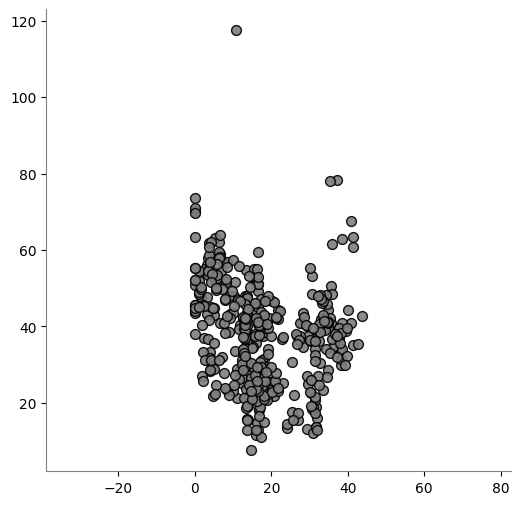

In [30]:
plt.figure(figsize=(6, 6))

plt.scatter(
    X[:, 0],
    X[:, 1],
    color="tab:gray",
    edgecolors="k",
    s=50,
    alpha=0.9,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

In [31]:
#
# Se generan tres centros elatorios iniciales
#
centers = np.array(
    [
        [9.96, 13.31],
        [13.24, 8.58],
        [14.58, 17.01],
    ],
    dtype=np.float64,
)

In [32]:
distances = euclidean_distances(X, centers)
distances[:5, :]

array([[33.02165502, 34.80804505, 27.20015625],
       [30.42439317, 34.19783619, 25.66597943],
       [34.15370697, 38.72004649, 30.31703317],
       [41.62422011, 46.22003894, 37.81167148],
       [30.20009437, 35.48982953, 27.79324558]])

In [33]:
labels = np.argmin(distances, axis=1)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

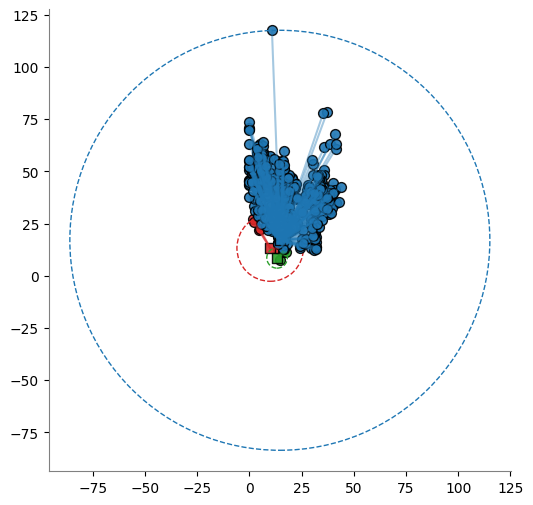

In [34]:
plot_clusters(X, centers, labels)

In [35]:
centers = compute_centers(X, centers, labels)
centers

array([[ 5.48      , 21.92      ],
       [16.06666667, 10.13333333],
       [17.87536946, 38.38374384]])

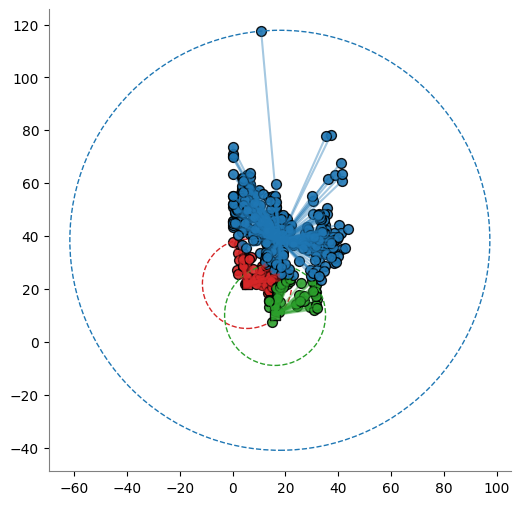

array([[10.33050847, 26.08983051],
       [22.68979592, 17.55510204],
       [18.33888889, 43.54346405]])

In [36]:
#
# Iteración #2
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

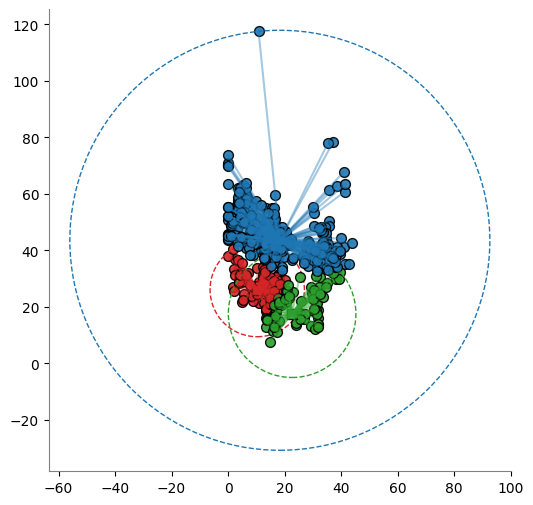

array([[11.71098901, 27.86153846],
       [25.05428571, 20.62285714],
       [17.83992095, 46.42213439]])

In [37]:
#
# Iteración #3
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

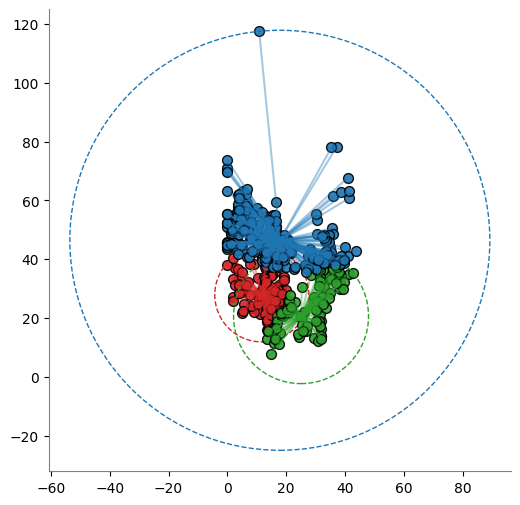

array([[12.02330097, 28.34757282],
       [27.43012048, 23.44096386],
       [16.74517544, 47.6245614 ]])

In [38]:
#
# Iteración #4
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

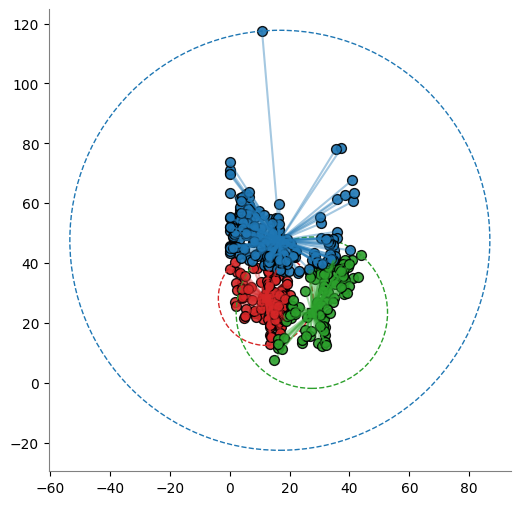

array([[12.4982906 , 27.64102564],
       [30.45714286, 28.09591837],
       [14.50201005, 48.92663317]])

In [39]:
#
# Iteración #5
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

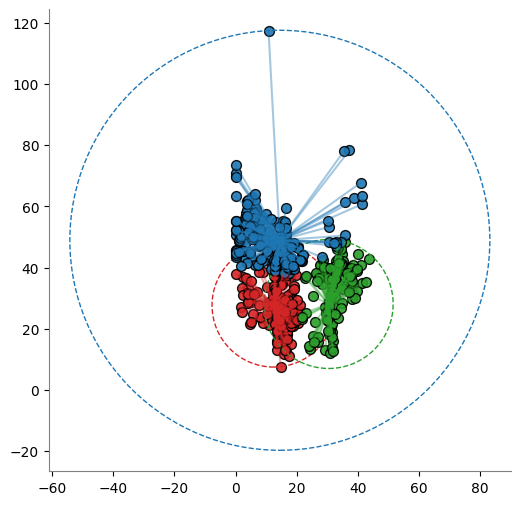

array([[13.36940299, 26.73432836],
       [32.43333333, 32.64351852],
       [11.85290698, 50.09244186]])

In [40]:
#
# Iteración #6
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

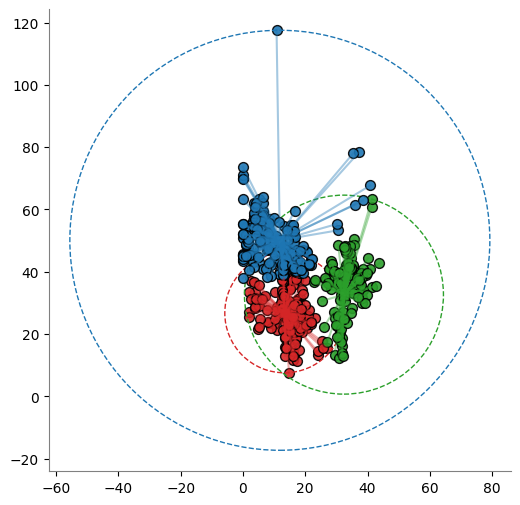

array([[14.18652482, 26.1893617 ],
       [33.21100917, 35.17981651],
       [10.44329268, 49.97865854]])

In [41]:
#
# Iteración #7
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

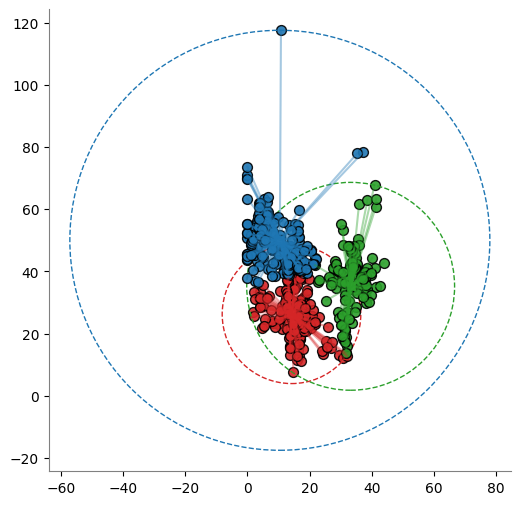

array([[14.97448276, 25.58965517],
       [33.40183486, 37.4853211 ],
       [ 9.505625  , 49.54625   ]])

In [42]:
#
# Iteración #8
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

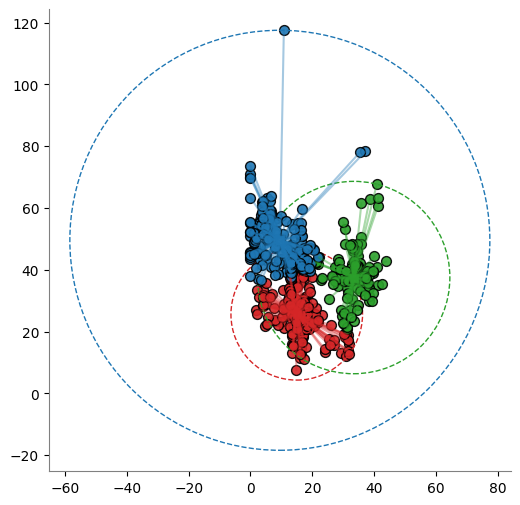

array([[15.7410596 , 25.13377483],
       [33.20666667, 38.97238095],
       [ 9.3       , 49.59810127]])

In [43]:
#
# Iteración #9
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

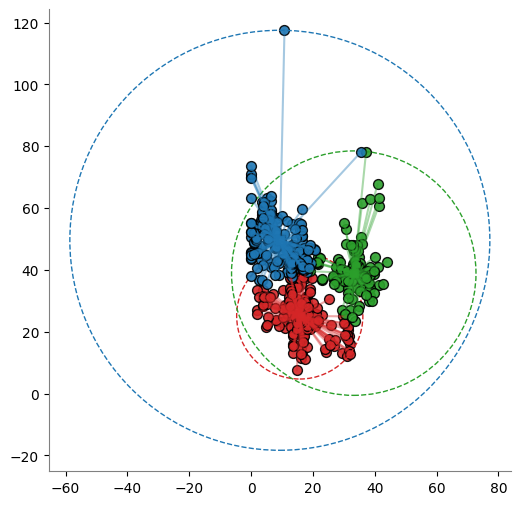

array([[16.34423077, 25.01794872],
       [33.20490196, 40.30392157],
       [ 8.95128205, 49.42307692]])

In [44]:
#
# Iteración #10
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

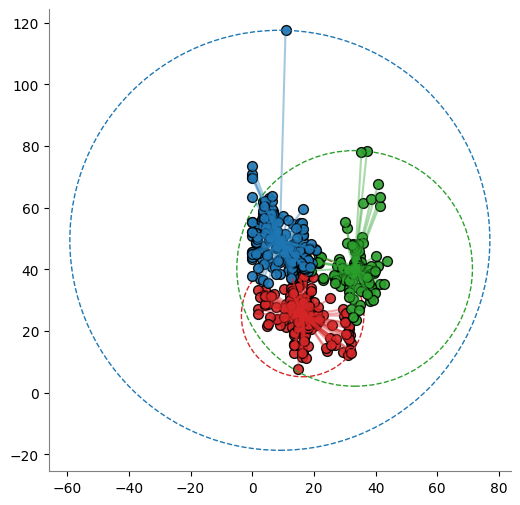

array([[16.53949045, 24.95796178],
       [33.29306931, 40.95148515],
       [ 8.80576923, 49.16217949]])

In [45]:
#
# Iteración #11
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

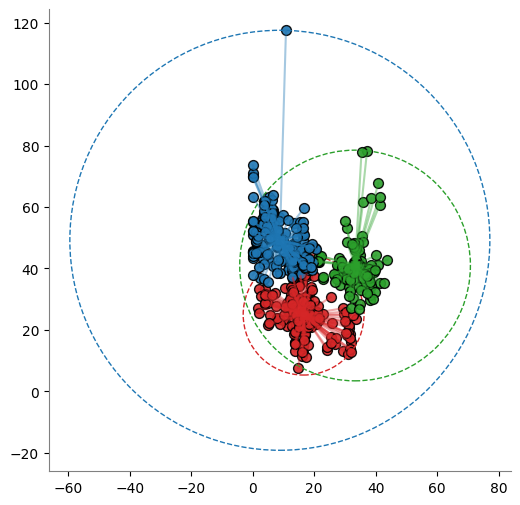

array([[16.75379747, 24.86392405],
       [33.44183673, 41.30918367],
       [ 8.91518987, 49.03164557]])

In [46]:
#
# Iteración #12
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

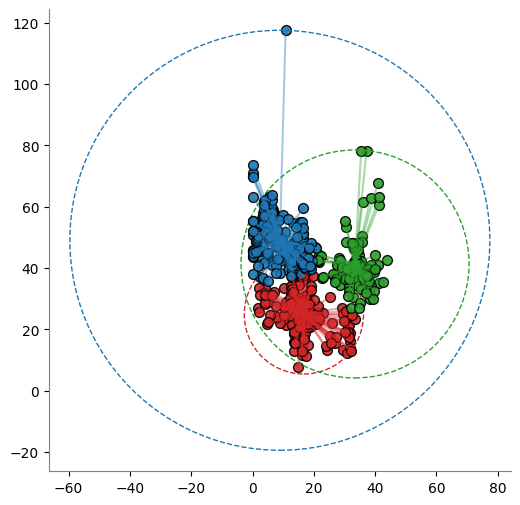

array([[16.75379747, 24.86392405],
       [33.44183673, 41.30918367],
       [ 8.91518987, 49.03164557]])

In [47]:
#
# Iteración #13
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

In [48]:
kmeans = KMeans(
    # -------------------------------------------------------------------------
    # Numero de clusters
    n_clusters=3,
    # -------------------------------------------------------------------------
    # Algoritmo para inicializar los clusters:
    # 'k-means++': Selecciona los puntos iniciales entre los datos del dataset
    # 'random': aleatorio
    init="k-means++",
    # -------------------------------------------------------------------------
    #
    n_init=10,
    # -------------------------------------------------------------------------
    #
    max_iter=300,
    # -------------------------------------------------------------------------
    #
    random_state=None,
    # -------------------------------------------------------------------------
    # 'full': algoritmo clásico,
    # 'elkan': variación con eficiencia computacional que evita computar las
    # distancias entre todos los puntos.
    algorithm="auto",
)

kmeans.fit(X)

kmeans.predict(X)

array([2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2,
       1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2,
       0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1,

In [49]:
#
# Centros de los clusters
#
kmeans.cluster_centers_

array([[16.91059603, 24.30860927],
       [ 9.10424242, 48.51454545],
       [33.44183673, 41.30918367]])

In [50]:
#
# Cluster asignado a cada punto
#
kmeans.labels_

array([2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2,
       1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2,
       0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1,

In [51]:
#
# Sum of squared distances of samples to their closest cluster center, weighted
# by the sample weights if provided.
#
kmeans.inertia_

45873.51417959839

In [52]:
kmeans.n_iter_

6

In [13]:
print('ok_')

ok_
